In [58]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle

## libraries for ANN
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [45]:
all_batters = pd.read_csv('all_batters.csv')
all_bowlers = pd.read_csv('all_bowlers.csv')
Match_Results =pd.read_csv('Match_Results.csv')
all_squad=pd.read_csv('all_squad.csv')
combined_data = pd.read_csv('combined_data.csv')

,Unnamed: 0,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wins
0,0,India,Australia,Australia,6 wickets,Ahmedabad,"Nov 19, 2023",ODI # 4705,14
1,1,Australia,South Africa,Australia,3 wickets,Eden Gardens,"Nov 16, 2023",ODI # 4704,14
2,2,India,New Zealand,India,70 runs,Wankhede,"Nov 15, 2023",ODI # 4703,25
3,3,India,Netherlands,India,160 runs,Bengaluru,"Nov 12, 2023",ODI # 4702,25
4,4,England,Pakistan,England,93 runs,Eden Gardens,"Nov 11, 2023",ODI # 4701,10


In [63]:
Match_Results['Winner'].unique()

array(['Australia', 'India', 'England', 'South Africa', 'New Zealand',
       'Bangladesh', 'Pakistan', 'Afghanistan', 'Netherlands',
       'Sri Lanka', 'no result', 'West Indies', 'U.A.E.', 'Scotland',
       'Ireland', 'Nepal', 'Zimbabwe', 'tied', 'Oman', 'Canada',
       'Namibia', 'U.S.A.', 'Jersey', 'P.N.G.'], dtype=object)

# Models

### Predicting Match Winners

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'Team 1', 'Team 2', 'Ground', and other relevant features as input features
features = ['Team 1', 'Team 2', 'Ground', 'Wins']

# Extracting features and target variable
X = Match_Results[features]
y = Match_Results['Winner']

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 71.43%


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

Classification Report:
               precision    recall  f1-score   support

 Afghanistan       1.00      1.00      1.00         1
   Australia       1.00      0.33      0.50         3
  Bangladesh       0.75      1.00      0.86         3
      Canada       1.00      1.00      1.00         1
     England       0.67      1.00      0.80         2
       India       1.00      1.00      1.00         3
     Ireland       0.50      1.00      0.67         1
     Namibia       0.00      0.00      0.00         1
       Nepal       1.00      0.67      0.80         3
 Netherlands       1.00      1.00      1.00         1
 New Zealand       0.67      0.67      0.67         3
        Oman       0.00      0.00      0.00         1
      P.N.G.       0.50      1.00      0.67         1
    Pakistan       0.00      0.00      0.00         0
    Scotland       1.00      0.50      0.67         2
South Africa       0.80      1.00      0.89         4
   Sri Lanka       1.00      1.00      1.00         3
   

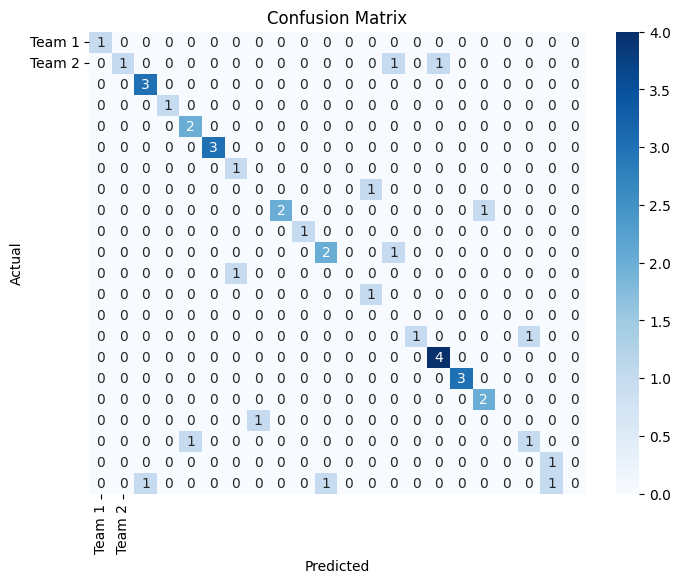

In [47]:
# Generate and print the classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Team 1', 'Team 2'], yticklabels=['Team 1', 'Team 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [59]:
# Save the trained model to a file using pickle
with open('logistic_regression_model_cricket.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [48]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 73.81%


In [49]:
from sklearn.metrics import classification_report

# Assuming rf_model is your trained Random Forest model
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Generate and print the classification report
class_report_rf = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Classification Report:
               precision    recall  f1-score   support

 Afghanistan       1.00      1.00      1.00         1
   Australia       1.00      1.00      1.00         3
  Bangladesh       0.75      1.00      0.86         3
      Canada       1.00      1.00      1.00         1
     England       0.67      1.00      0.80         2
       India       0.75      1.00      0.86         3
     Ireland       0.33      1.00      0.50         1
     Namibia       0.00      0.00      0.00         1
       Nepal       1.00      0.67      0.80         3
 Netherlands       1.00      1.00      1.00         1
 New Zealand       0.67      0.67      0.67         3
        Oman       0.00      0.00      0.00         1
      P.N.G.       1.00      1.00      1.00         1
    Scotland       0.50      0.50      0.50         2
South Africa       1.00      1.00      1.00         4
   Sri Lanka       1.00      1.00      1.00         3
      U.A.E.       0.50      1.00      0.67

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

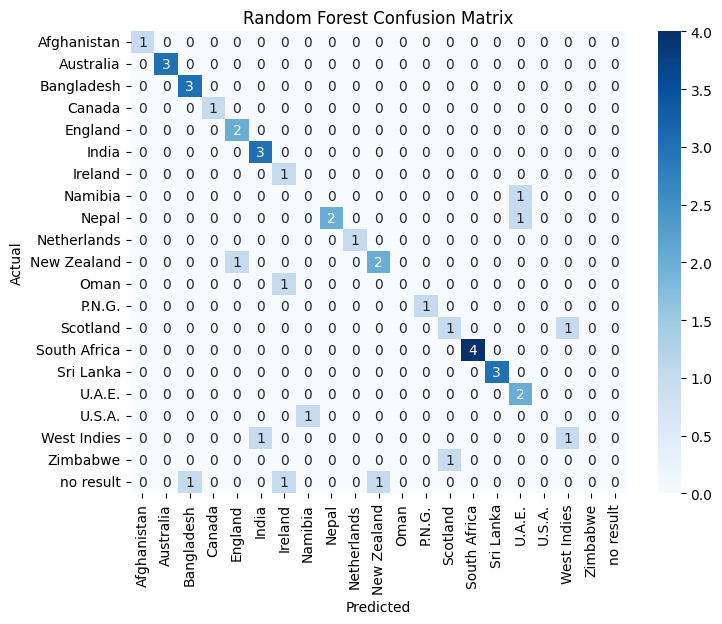

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Generate and plot the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [55]:
ann = Sequential() ## initialising

# layers
ann.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 96))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.25))
ann.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
## compile the network
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                1552      
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1769 (6.91 KB)
Trainable params: 1769 (6

In [57]:
## train the network
history = ann.fit(X_train, y_train, batch_size = 8, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\User\AppData\Local\Temp\ipykernel_25780\2491035371.py", line 2, in <module>

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_4100]

### Bowler Performance Prediction

In [ ]:
# Assuming 'Runs' column has non-numeric values
all_bowlers['Runs'] = pd.to_numeric(all_bowlers['Runs'], errors='coerce')

Mean Squared Error: 36.72
R-squared: 0.95


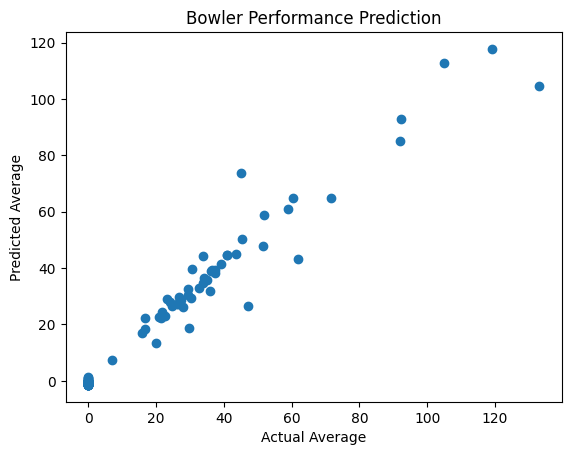

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'all_bowlers' is your DataFrame with bowler data
# Adjust the features based on your dataset
features = ['Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'SR', '5', '10']

# Extracting features and target variable
X = all_bowlers[features]
y = all_bowlers['Ave']  # Assuming 'Ave' is the average, adjust if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Average')
plt.ylabel('Predicted Average')
plt.title('Bowler Performance Prediction')
plt.show()

# Calculate the percentage accuracy
percentage_accuracy = 100 * (1 - (mse / y_test.var()))

print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')


In [ ]:
# Calculate the percentage accuracy
percentage_accuracy = 100 * (1 - (mse / y_test.var()))

print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')


Percentage Accuracy: 95.49%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'all_bowlers' is your DataFrame with bowler data
# Adjust the features based on your dataset
features = ['Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'SR', '5', '10']

# Extracting features and target variable
X = all_bowlers[features]
y = all_bowlers['Ave']  # Assuming 'Ave' is the average, adjust if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.2f}')

# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Average')
plt.ylabel('Predicted Average')
plt.title('Bowler Performance Prediction')
plt.show()


KeyboardInterrupt: 

### Batsman Performance Prediction